# Face Detection with Haar Cascades
**Name:** EASWAR R **Reg.No:** 212223230053
**Slot:** 4E6-1

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [2]:
model = cv2.imread('image_01.png',0)
withglass = cv2.imread('image_02.png',0)
group = cv2.imread('image_03.png',0)

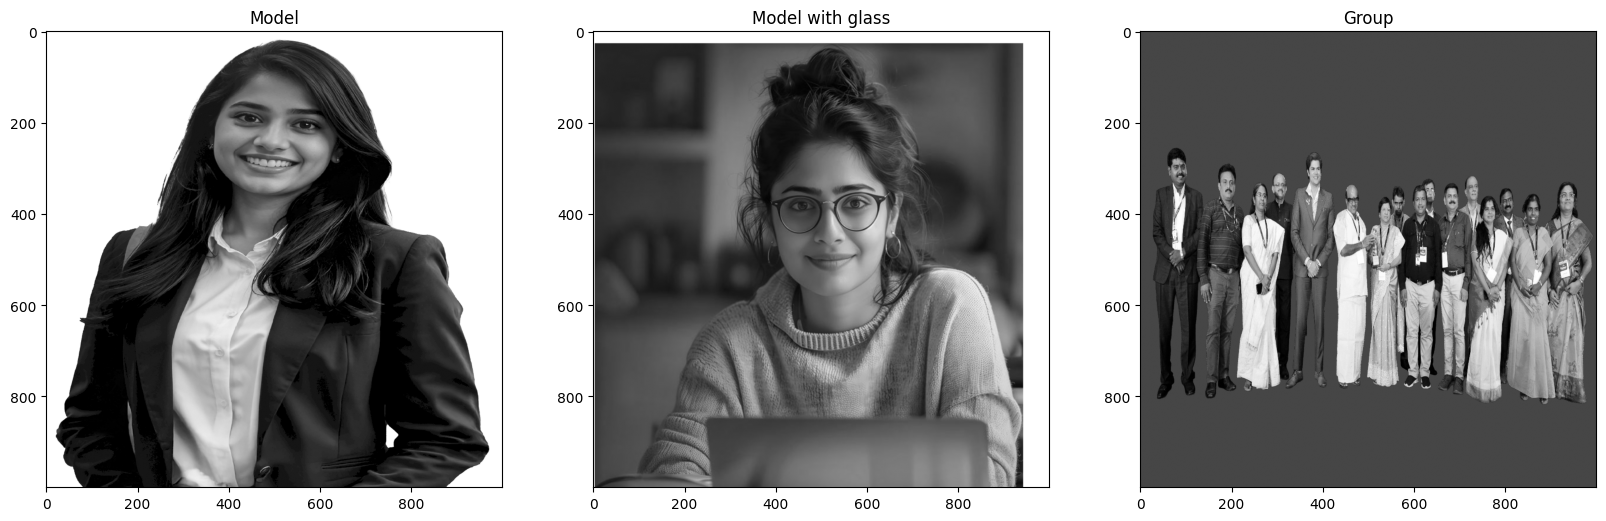

In [3]:
plt.figure(figsize=(20,10))
plt.subplot(131);plt.imshow(cv2.resize(model, (1000, 1000)),cmap='gray');plt.title("Model")
plt.subplot(132);plt.imshow(cv2.resize(withglass, (1000, 1000)),cmap='gray');plt.title("Model with glass")
plt.subplot(133);plt.imshow(cv2.resize(group, (1000, 1000)),cmap='gray');plt.title("Group")
plt.show()

# Cascade Files

In [4]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

# Face Detection

In [5]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.1, minNeighbors=5) 
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
    return face_img

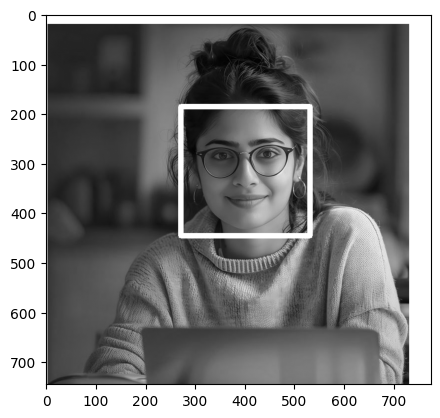

In [6]:
result = detect_face(withglass)
plt.imshow(result,cmap='gray')
plt.show()

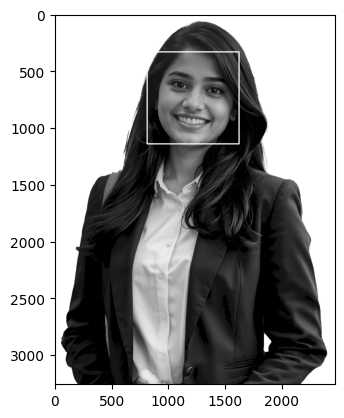

In [7]:
result = detect_face(model)
plt.imshow(result,cmap='gray')
plt.show()

In [8]:
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [9]:
def detect_eyes(img):
    face_img = img.copy()
    eyes = eye_cascade.detectMultiScale(face_img) 
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
    return face_img

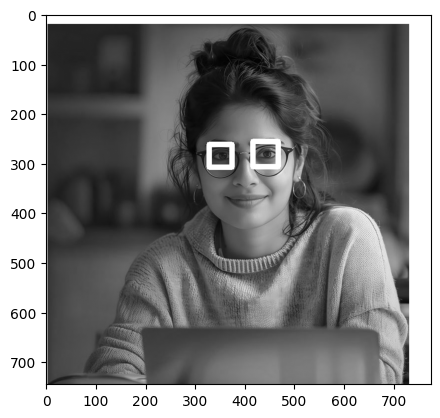

In [10]:
result = detect_eyes(withglass)
plt.imshow(result,cmap='gray')
plt.show()

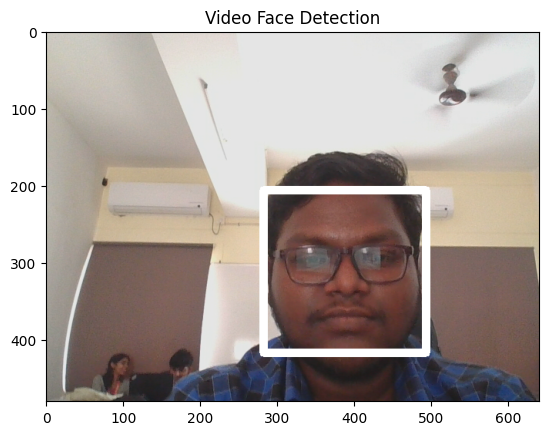

In [11]:
cap = cv2.VideoCapture(0)

plt.ion()
fig, ax = plt.subplots()

ret, frame = cap.read()
frame = detect_face(frame)
im = ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title("Video Face Detection")

while plt.fignum_exists(fig.number):    
    ret, frame = cap.read()
    if not ret:
        break

    frame = detect_face(frame)
    im.set_data(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.pause(0.01)

cap.release()
plt.close()